In [64]:
import pandas as pd
pd.set_option('max_colwidth', 200)
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [24]:
f= r'SW_EpisodeIVLocal.txt'
data1 = pd.read_csv(f, delimiter='|')
data1 = data1.drop('Sr', axis=1)
data1.head(10)

,character,dialogue
0,THREEPIO,Did you hear that? They've shut down the main reactor. We'll be destroyed for sure. This is madness!
1,THREEPIO,We're doomed!
2,THREEPIO,There'll be no escape for the Princess this time.
3,THREEPIO,What's that?
4,THREEPIO,I should have known better than to trust the logic of a half-sized thermocapsulary dehousing assister...
5,LUKE,Hurry up! Come with me! What are you waiting for?! Get in gear!
6,THREEPIO,"Artoo! Artoo-Detoo, where are you?"
7,THREEPIO,At last! Where have you been?
8,THREEPIO,They're heading in this direction. What are we going to do? We'll be sent to the spice mines of Kessel or smashed into who knows what!
9,THREEPIO,"Wait a minute, where are you going?"


In [25]:
f= r'SW_EpisodeVLocal.txt'
data2 = pd.read_csv(f, delimiter='|')
data2 = data2.drop('Sr', axis=1)
data2.head(10)

,character,dialogue
0,LUKE,"Echo Three to Echo Seven. Han, old buddy, do you read me?"
1,HAN,"Loud and clear, kid. What's up?"
2,LUKE,"Well, I finished my circle. I don't pick up any life readings."
3,HAN,There isn't enough life on this ice cube to fill a space cruiser. The sensors are placed. I'm going back.
4,LUKE,Right. I'll see you shortly. There's a meteorite that hit the ground near here. I want to check it out. It won't take long.
5,LUKE,"Hey, steady girl. What's the matter? You smell something?"
6,LUKE,Aaargh!
7,HAN,Chewie!
8,HAN,"All right, don't lose your temper. I'll come right back and give you a hand."
9,RIEEKAN,Solo?


In [26]:
f= r'SW_EpisodeVILocal.txt'
data3 = pd.read_csv(f, delimiter='|')
data3 = data3.drop('Sr', axis=1)
data3.head(10)

,character,dialogue
0,SHUTTLE CAPTAIN,"Command station, this is ST 321. Code Clearance Blue. We're starting our approach. Deactivate the security shield."
1,DEATH STAR CONTROLLER,The security deflector shield will be deactivated when we have confirmation of your code transmission. Stand by... You are clear to proceed.
2,SHUTTLE CAPTAIN,We're starting our approach.
3,OFFICER,Inform the commander that Lord Vader's shuttle has arrived.
4,OPERATOR,"Yes, sir."
5,JERJERROD,"Lord Vader, this is an unexpected pleasure. We're honored by your presence."
6,VADER,"You may dispense with the pleasantries, Commander. I'm here to put you back on schedule."
7,JERJERROD,"I assure you, Lord Vader, my men are working as fast as they can."
8,VADER,Perhaps I can find new ways to motivate them.
9,JERJERROD,"I tell you, this station will be operational as planned."


In [112]:
def cleancorpus(data):

    stop_words = set(stopwords.words('english'))
    # add words that aren't in the NLTK stopwords list
    new_stopwords = ['thats','weve','hes','theres','ive','im','will','can','cant','dont','youve','us'
        ,'youre','youll','theyre','whats','didnt']
    new_stopwords_list = stop_words.union(new_stopwords)
    data["dialogue"] = data["dialogue"].str.replace('[^\w\s]','')
    data.dialogue = data.dialogue.apply(lambda x: x.lower())
    data.dialogue = data.dialogue.str.replace('\d+', '')
    data.dialogue = data.dialogue.str.split().apply\
        (lambda x: ' '.join(item for item in x if item not in new_stopwords_list))
    data.dialogue = data.dialogue.str.replace('  ', '')
    #print(data1.dialogue.head(120))
    #print(data.dialogue)
    return data



def get_top_n_words(corpus):
    word_list = []
    dialogue_list = pd.Series(corpus['dialogue'])
    dialogue_list_temp = dialogue_list.tolist()
    for stat in dialogue_list_temp:
        word_list.extend(stat.split())
    word_series = pd.Series(word_list)
    return word_series.value_counts()


def bigrams_calculate(bigramfile):
    i = bigramfile.dialogue \
        .str.split(expand=True) \
        .stack()
    j = i + ' ' + i.shift(-1)
    bigrams = j.dropna().reset_index(drop=True)
    return bigrams


def most_frequent_bigrams(freq_bigrams):
#     bigrams_list = pd.Series(freq_bigrams)
    count_bigrams = freq_bigrams.value_counts()[0:20,]
    return count_bigrams


In [46]:
data1=cleancorpus(data1)
data1

,character,dialogue
0,THREEPIO,hear theyve shut main reactor well destroyed sure madness
1,THREEPIO,doomed
2,THREEPIO,therell escape princess time
3,THREEPIO,
4,THREEPIO,known better trust logic halfsized thermocapsulary dehousing assister
5,LUKE,hurry come waiting get gear
6,THREEPIO,artoo artoodetoo
7,THREEPIO,last
8,THREEPIO,heading direction going well sent spice mines kessel smashed knows
9,THREEPIO,wait minute going


In [51]:
#Dialogues Episodes
len(data1.dialogue)

1010

In [50]:
#Characters Episodes
len(data1.character.unique())

60

In [52]:
#Most Frequent words
get_top_n_words(data1)

going        71
luke         63
get          60
well         51
right        50
come         47
sir          46
know         40
one          39
got          39
think        37
see          36
go           33
back         33
ship         32
like         32
take         29
look         26
time         26
red          26
must         24
ill          24
could        24
oh           23
force        22
help         21
old          21
want         21
alderaan     20
station      20
             ..
fate          1
suit          1
awhile        1
thanks        1
delays        1
begins        1
years         1
prepare       1
curse         1
supposed      1
guard         1
nonsense      1
whered        1
fallen        1
operation     1
impacted      1
glad          1
charge        1
standby       1
stillfor      1
line          1
single        1
frankly       1
starship      1
baywhat       1
rightful      1
tiree         1
markings      1
marks         1
marching      1
Length: 1691, dtype: int

In [67]:
top_char = data1.character.value_counts()[0:20,]
top_char

LUKE                         254
HAN                          153
THREEPIO                     119
BEN                           82
LEIA                          57
VADER                         41
RED LEADER                    37
BIGGS                         34
TARKIN                        28
OWEN                          25
TROOPER                       19
WEDGE                         14
GOLD LEADER                   14
OFFICER                       11
RED TEN                        8
GOLD FIVE                      7
INTERCOM VOICE                 6
AUNT BERU                      6
DODONNA                        6
DEATH STAR INTERCOM VOICE      6
Name: character, dtype: int64

In [113]:
mfb = most_frequent_bigrams(bigrams_calculate(data1))
mfb

luke luke         12
obiwan kenobi     12
r unit            11
rebel base        11
sand people       10
battle station    10
looks like         9
standing red       8
lord vader         7
uncle owen         7
know talking       6
red leader         6
let go             6
come back          6
ben kenobi         5
death star         5
yes sir            5
help obiwan        5
tractor beam       5
red five           5
dtype: int64

In [114]:
a = mfb.to_frame()
a = a.reset_index()
a

,index,0
0,luke luke,12
1,obiwan kenobi,12
2,r unit,11
3,rebel base,11
4,sand people,10
5,battle station,10
6,looks like,9
7,standing red,8
8,lord vader,7
9,uncle owen,7


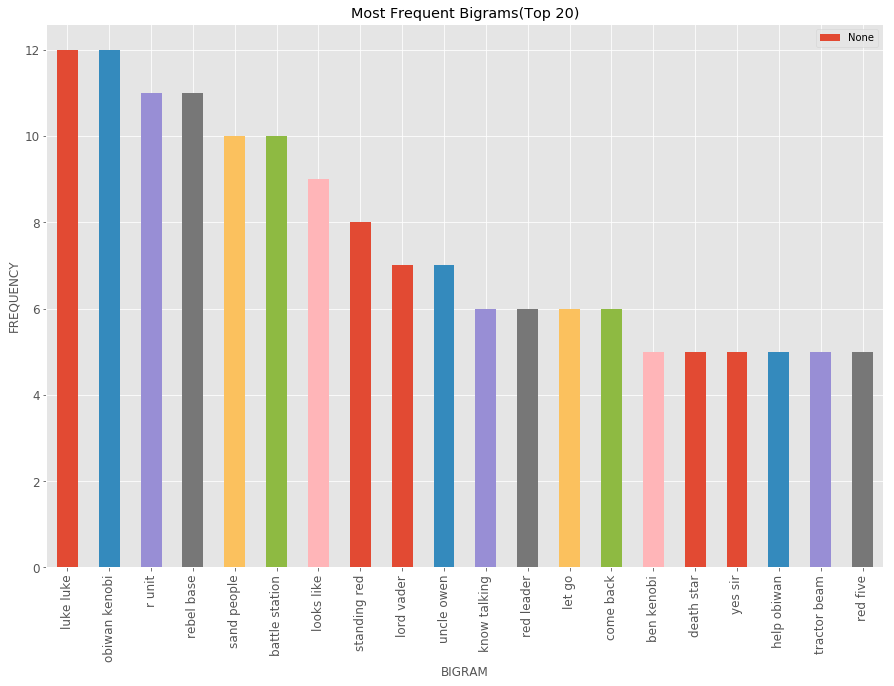

In [116]:
def ggplt_bg(df_ep_bigram):
    plt.style.use('ggplot')
    a = df_ep_bigram.to_frame()
    a = a.reset_index()
    ax = df_ep_bigram.plot(kind='bar', title="Most Frequent Bigrams(Top 20)", figsize=(15, 10),
                                                    legend=True, fontsize=12)
    ax.set_xlabel("BIGRAM", fontsize=12)
    ax.set_ylabel("FREQUENCY", fontsize=12)
    return plt.show()

ggplt_bg(mfb)

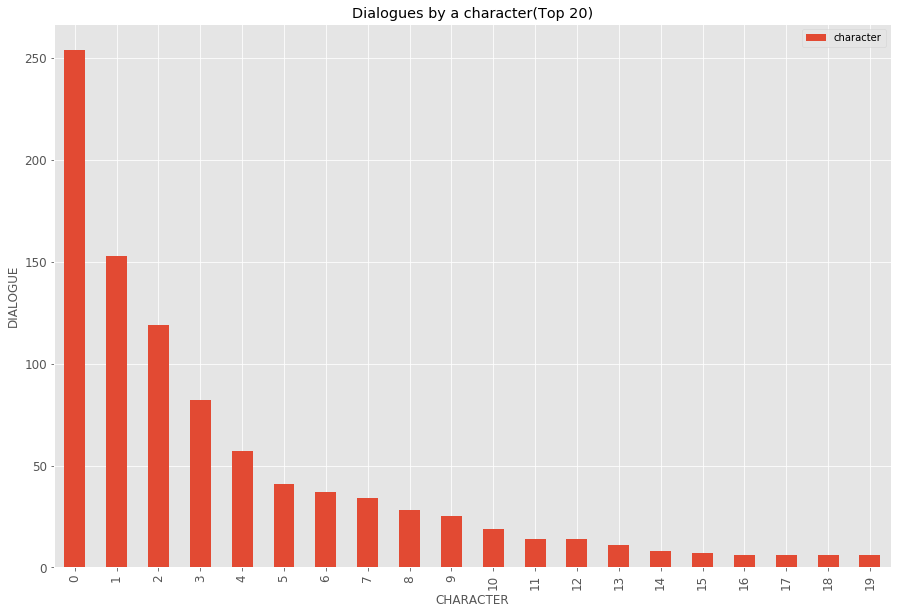

In [74]:
def ggplt(df_ep):
    plt.style.use('ggplot')
    a = df_ep.to_frame()
    a = a.reset_index()
    ax = a[['index', 'character']].plot(kind='bar', title="Dialogues by a character(Top 20)", figsize=(15, 10),
                                               legend=True, fontsize=12)
    ax.set_xlabel("CHARACTER", fontsize=12)
    ax.set_ylabel("DIALOGUE", fontsize=12)
    return plt.show()

ggplt(top_char)

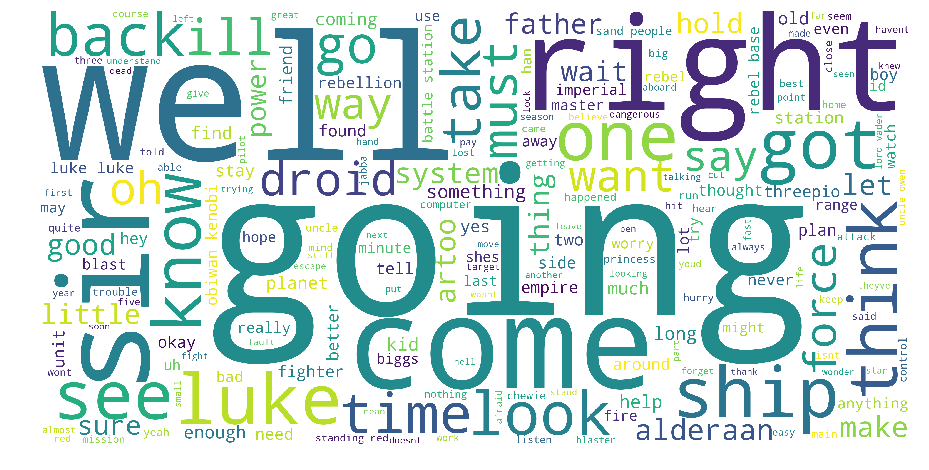

In [82]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data1['dialogue']=data1['dialogue'].astype('str')
dialogue_corpus=' '.join(data1['dialogue'])
dialogue_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(dialogue_corpus)
plt.figure(figsize=(16,8))
plt.imshow(dialogue_wordcloud)
plt.axis('off')
plt.show()

In [87]:
data2=cleancorpus(data2)
data2

,character,dialogue
0,LUKE,echo three echo seven han old buddy read
1,HAN,loud clear kid
2,LUKE,well finished circle pick life readings
3,HAN,isnt enough life ice cube fill space cruiser sensors placed going back
4,LUKE,right ill see shortly meteorite hit ground near want check wont take long
5,LUKE,hey steady girl matter smell something
6,LUKE,aaargh
7,HAN,chewie
8,HAN,right lose temper ill come right back give hand
9,RIEEKAN,solo


In [89]:
#Dialogues Episodes
len(data2.dialogue)

839

In [90]:
#Characters Episodes
len(data2.character.unique())

49

In [91]:
#Most Frequent words
get_top_n_words(data2)

oh             42
well           41
yes            40
sir            38
right          38
know           36
going          35
get            33
good           31
see            29
go             28
lord           28
artoo          27
come           27
chewie         26
luke           25
like           25
vader          24
take           22
ill            20
got            20
ship           19
must           19
one            19
back           18
time           18
could          17
system         17
skywalker      16
leia           16
               ..
landed          1
technology      1
noisy           1
sawi            1
avenger         1
spotted         1
search          1
trusted         1
merely          1
today           1
treethe         1
fought          1
shutting        1
equipment       1
likei           1
easily          1
grandeur        1
armors          1
smugglers       1
override        1
run             1
rather          1
lead            1
disappeared     1
picked    

In [92]:
top_char = data2.character.value_counts()[0:20,]
top_char

HAN             182
LUKE            128
LEIA            114
THREEPIO         92
LANDO            61
VADER            56
YODA             36
PIETT            23
CREATURE         21
BEN              15
RIEEKAN          13
WEDGE             8
DECK OFFICER      7
VEERS             7
ZEV               6
EMPEROR           5
NEEDA             5
OZZEL             5
JANSON            4
BOBA FETT         4
Name: character, dtype: int64

In [117]:
mfb = most_frequent_bigrams(bigrams_calculate(data2))
mfb

lord vader             14
yes lord                9
dark side               7
asteroid field          7
master luke             6
rouge two               6
captain solo            6
bounty hunter           6
millennium falcon       5
energy shield           5
take care               5
wait wait               4
dagobah system          4
lando calrissian        4
oh dear                 4
commander skywalker     4
right sir               4
yes sir                 4
turn around             4
star destroyer          4
dtype: int64

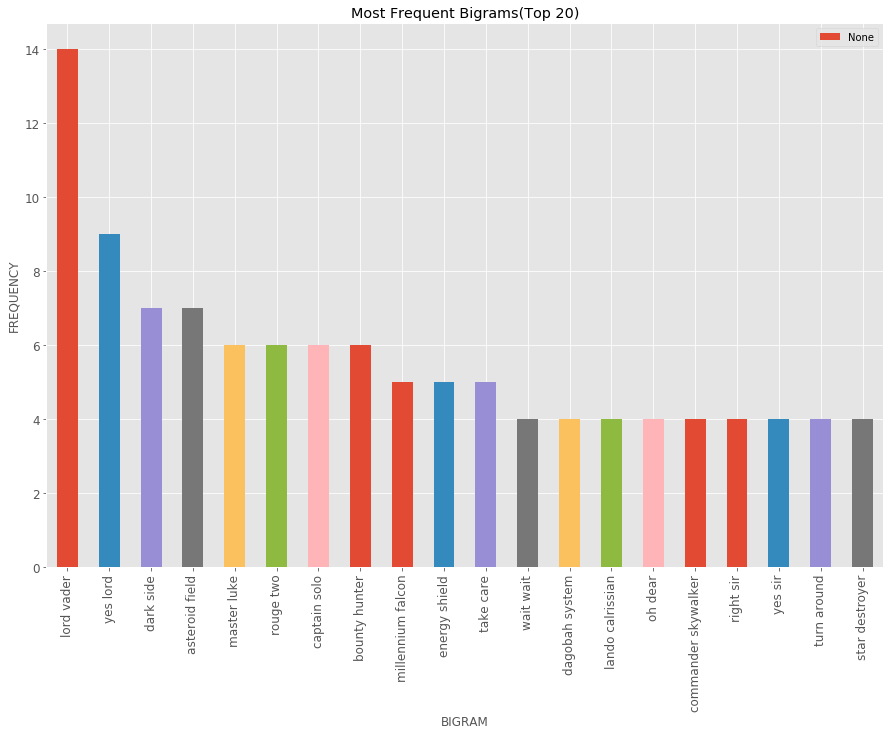

In [118]:
ggplt_bg(mfb)

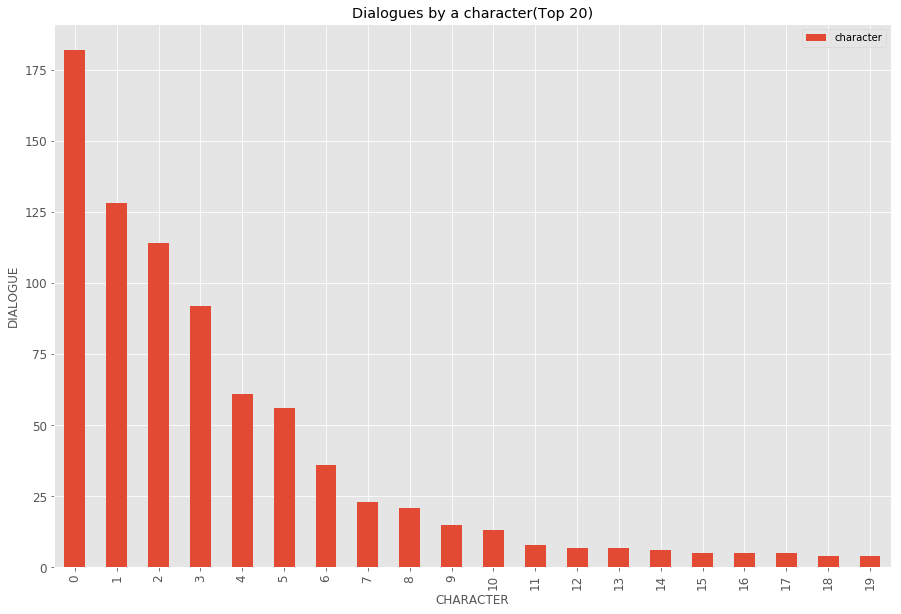

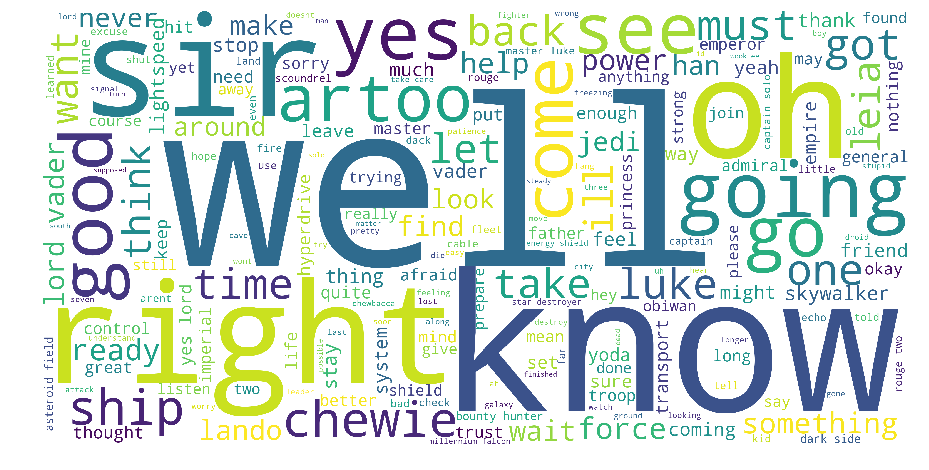

In [83]:
def ggplt(df_ep):
    plt.style.use('ggplot')
    a = df_ep.to_frame()
    a = a.reset_index()
    ax = a[['index', 'character']].plot(kind='bar', title="Dialogues by a character(Top 20)", figsize=(15, 10),
                                               legend=True, fontsize=12)
    ax.set_xlabel("CHARACTER", fontsize=12)
    ax.set_ylabel("DIALOGUE", fontsize=12)
    return plt.show()

ggplt(top_char)

import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data2['dialogue']=data2['dialogue'].astype('str')
dialogue_corpus=' '.join(data2['dialogue'])
dialogue_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(dialogue_corpus)
plt.figure(figsize=(16,8))
plt.imshow(dialogue_wordcloud)
plt.axis('off')
plt.show()

In [93]:
data3=cleancorpus(data3)
data3

,character,dialogue
0,SHUTTLE CAPTAIN,command station st code clearance blue starting approach deactivate security shield
1,DEATH STAR CONTROLLER,security deflector shield deactivated confirmation code transmission stand clear proceed
2,SHUTTLE CAPTAIN,starting approach
3,OFFICER,inform commander lord vaders shuttle arrived
4,OPERATOR,yes sir
5,JERJERROD,lord vader unexpected pleasure honored presence
6,VADER,may dispense pleasantries commander put back schedule
7,JERJERROD,assure lord vader men working fast
8,VADER,perhaps find new ways motivate
9,JERJERROD,tell station operational planned


In [94]:
#Dialogues Episodes
len(data3.dialogue)

674

In [95]:
#Characters Episodes
len(data3.character.unique())

53

In [96]:
#Most Frequent words
get_top_n_words(data3)

oh             44
luke           37
artoo          34
come           34
get            30
well           29
father         29
chewie         29
good           28
know           28
master         27
right          25
see            22
back           22
take           22
yes            21
go             20
side           20
must           20
shield         20
got            19
emperor        19
jabba          18
help           16
vader          16
look           16
going          15
leia           15
tell           15
need           14
               ..
aggressive      1
reward          1
unpleasant      1
trained         1
stars           1
ridge           1
await           1
thisll          1
beneficial      1
wonderful       1
commencing      1
screen          1
hmmm            1
protected       1
mercy           1
hundred         1
journey         1
blowing         1
defenses        1
relatively      1
ackbar          1
best            1
nowgo           1
appraisal       1
wauaga    

In [97]:
top_char = data3.character.value_counts()[0:20,]
top_char

HAN             124
LUKE            112
THREEPIO         90
LEIA             56
VADER            43
LANDO            40
EMPEROR          39
JABBA            20
BEN              18
ACKBAR           14
YODA             13
WEDGE            11
PIETT             8
COMMANDER         7
JERJERROD         7
BOUSHH            7
NINEDENINE        6
STORMTROOPER      6
BIB               6
CONTROLLER        5
Name: character, dtype: int64

In [119]:
mfb = most_frequent_bigrams(bigrams_calculate(data3))
mfb

dark side           12
master luke         12
death star           8
oh oh                8
gold leader          6
captain solo         5
chewie chewie        5
darth vader          4
come lets            4
deflector shield     4
artoo artoo          4
oh dear              4
jabba hutt           4
lord vader           4
shield generator     4
general solo         4
come back            4
shuttle tydirium     4
yes master           3
young skywalker      3
dtype: int64

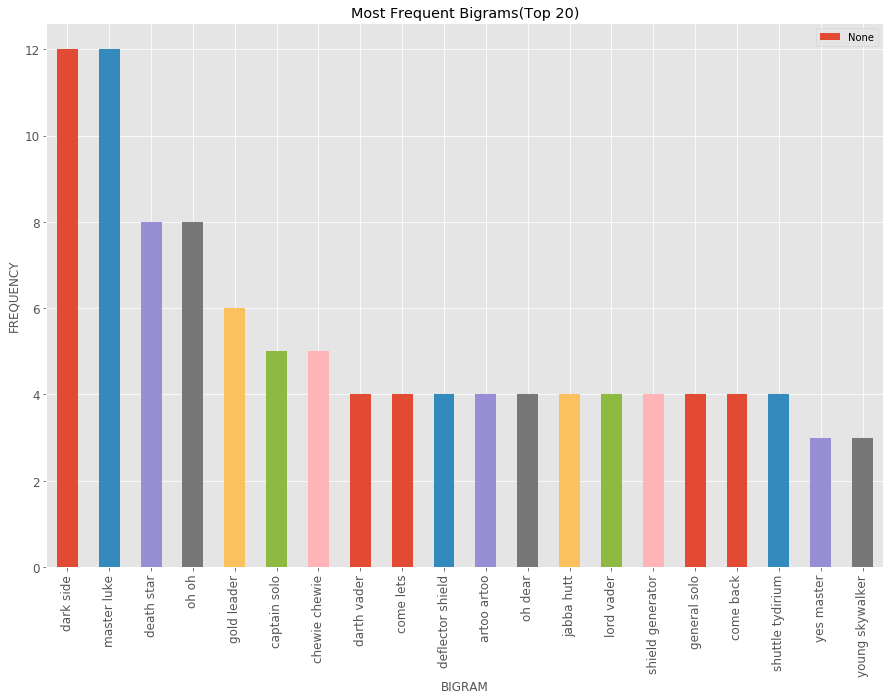

In [120]:
ggplt_bg(mfb)

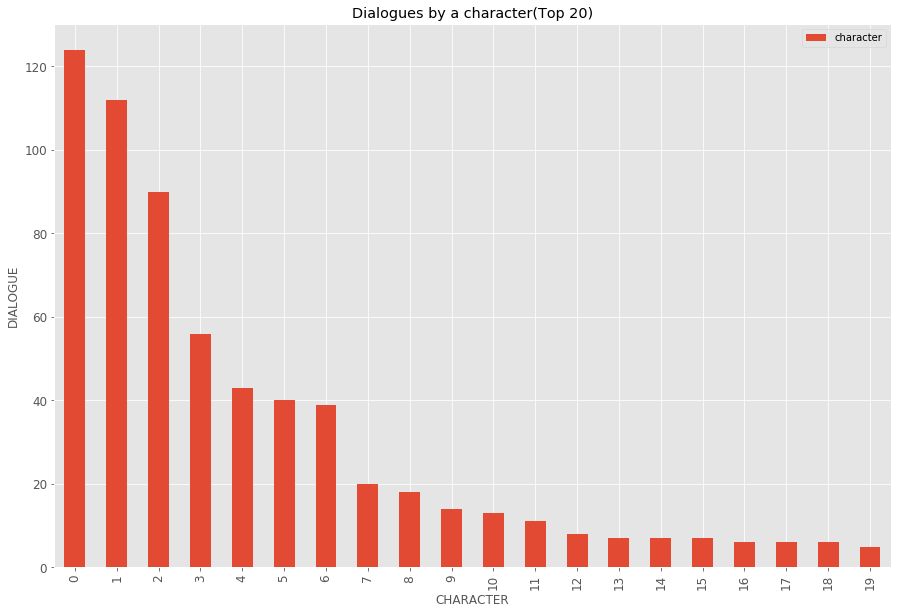

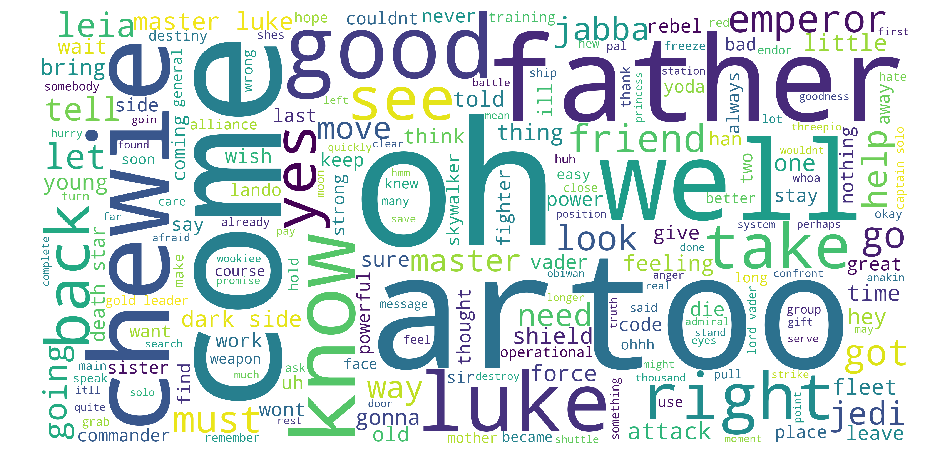

In [85]:
def ggplt(df_ep):
    plt.style.use('ggplot')
    a = df_ep.to_frame()
    a = a.reset_index()
    ax = a[['index', 'character']].plot(kind='bar', title="Dialogues by a character(Top 20)", figsize=(15, 10),
                                               legend=True, fontsize=12)
    ax.set_xlabel("CHARACTER", fontsize=12)
    ax.set_ylabel("DIALOGUE", fontsize=12)
    return plt.show()

ggplt(top_char)

import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data3['dialogue']=data3['dialogue'].astype('str')
dialogue_corpus=' '.join(data3['dialogue'])
dialogue_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(dialogue_corpus)
plt.figure(figsize=(16,8))
plt.imshow(dialogue_wordcloud)
plt.axis('off')
plt.show()

In [122]:
frames = [data1, data2, data3]
result = pd.concat(frames)
result

,character,dialogue
0,THREEPIO,hear theyve shut main reactor well destroyed sure madness
1,THREEPIO,doomed
2,THREEPIO,therell escape princess time
3,THREEPIO,
4,THREEPIO,known better trust logic halfsized thermocapsulary dehousing assister
5,LUKE,hurry come waiting get gear
6,THREEPIO,artoo artoodetoo
7,THREEPIO,last
8,THREEPIO,heading direction going well sent spice mines kessel smashed knows
9,THREEPIO,wait minute going


In [124]:
result=cleancorpus(result)
result

,character,dialogue
0,THREEPIO,hear theyve shut main reactor well destroyed sure madness
1,THREEPIO,doomed
2,THREEPIO,therell escape princess time
3,THREEPIO,
4,THREEPIO,known better trust logic halfsized thermocapsulary dehousing assister
5,LUKE,hurry come waiting get gear
6,THREEPIO,artoo artoodetoo
7,THREEPIO,last
8,THREEPIO,heading direction going well sent spice mines kessel smashed knows
9,THREEPIO,wait minute going


In [125]:
#Dialogues Episodes
len(result.dialogue)

2523

In [126]:
#Characters Episodes
len(result.character.unique())

129

In [127]:
#Most Frequent words
get_top_n_words(result)

luke                        125
get                         123
going                       121
well                        121
right                       113
oh                          109
come                        108
know                        104
sir                          90
see                          87
go                           81
artoo                        80
good                         78
got                          78
yes                          75
back                         73
take                         73
one                          71
like                         66
chewie                       64
must                         63
think                        62
ship                         57
time                         56
ill                          53
could                        53
look                         52
help                         52
master                       52
father                       51
                           ... 
stillfor

In [128]:
top_char = result.character.value_counts()[0:20,]
top_char

LUKE           494
HAN            459
THREEPIO       301
LEIA           227
VADER          140
BEN            115
LANDO          101
YODA            49
EMPEROR         44
RED LEADER      38
BIGGS           34
WEDGE           33
PIETT           31
TARKIN          28
JABBA           26
OWEN            25
CREATURE        22
TROOPER         19
GOLD LEADER     14
ACKBAR          14
Name: character, dtype: int64

In [129]:
mfb = most_frequent_bigrams(bigrams_calculate(result))
mfb

lord vader        25
master luke       22
dark side         20
luke luke         16
death star        13
r unit            12
come back         12
obiwan kenobi     12
battle station    12
yes sir           12
captain solo      11
looks like        11
rebel base        11
sand people       10
take care         10
oh oh             10
yes lord          10
gold leader       10
let go            10
princess leia      9
dtype: int64

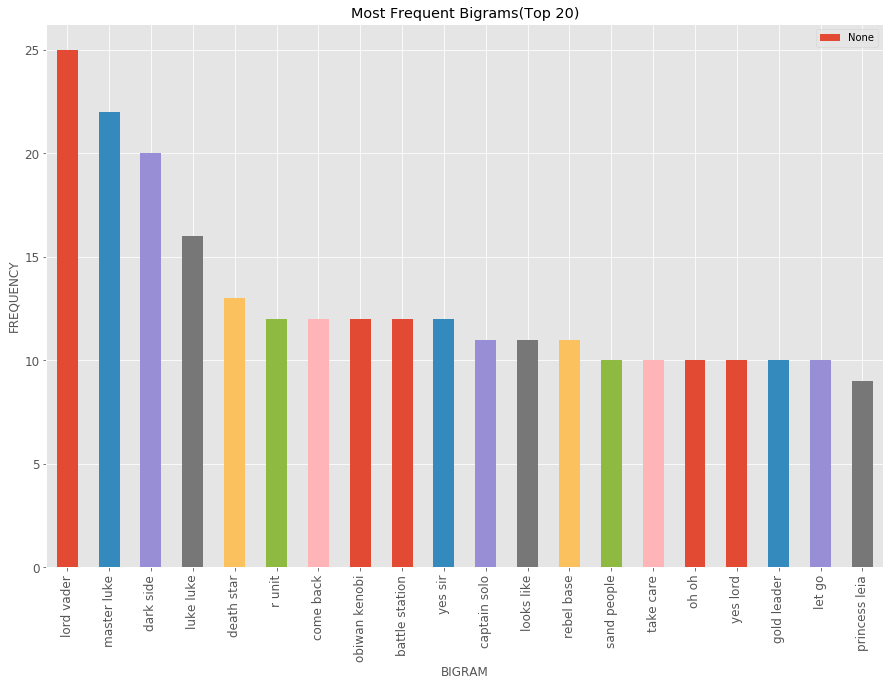

In [130]:
ggplt_bg(mfb)

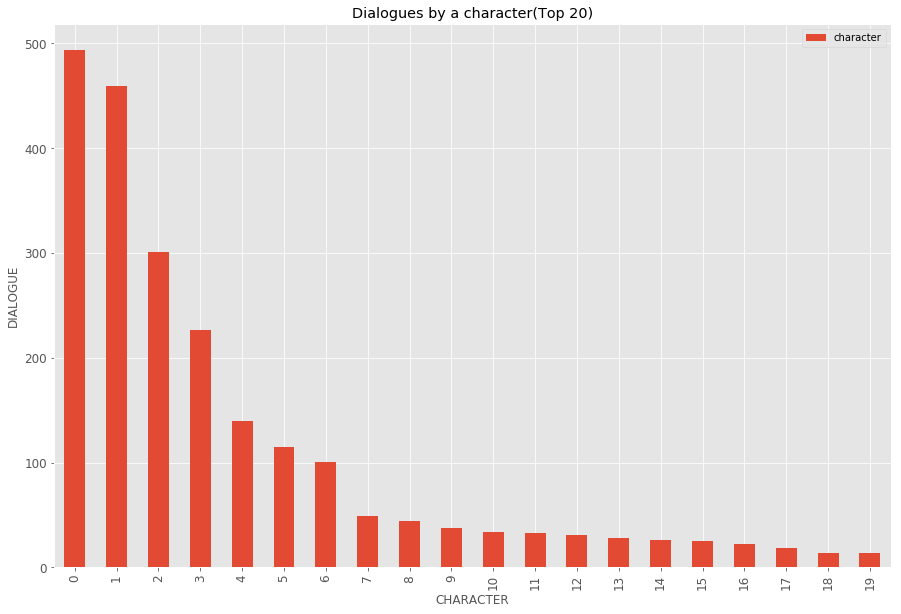

In [131]:
def ggplt(df_ep):
    plt.style.use('ggplot')
    a = df_ep.to_frame()
    a = a.reset_index()
    ax = a[['index', 'character']].plot(kind='bar', title="Dialogues by a character(Top 20)", figsize=(15, 10),
                                               legend=True, fontsize=12)
    ax.set_xlabel("CHARACTER", fontsize=12)
    ax.set_ylabel("DIALOGUE", fontsize=12)
    return plt.show()

ggplt(top_char)

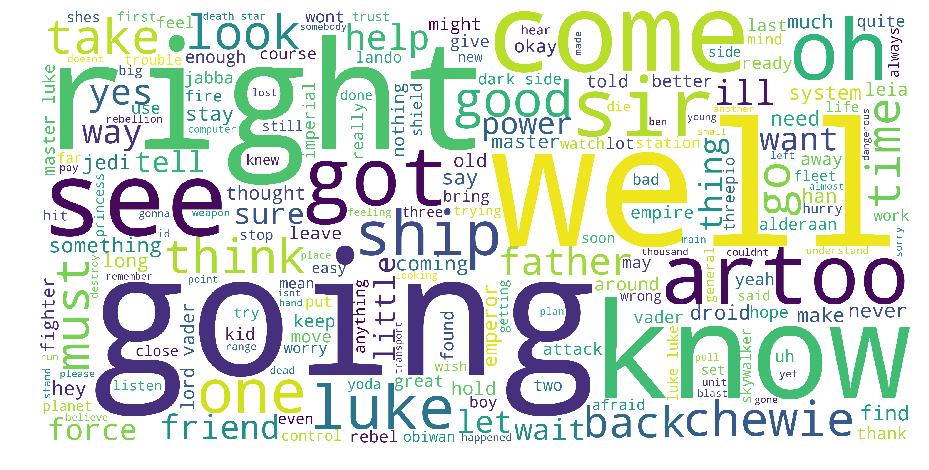

In [132]:

import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

result['dialogue']=result['dialogue'].astype('str')
dialogue_corpus=' '.join(result['dialogue'])
dialogue_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(dialogue_corpus)
plt.figure(figsize=(16,8))
plt.imshow(dialogue_wordcloud)
plt.axis('off')
plt.show()


In [163]:
#Sentiment Analysis
import nltk
import itertools
import collections
from collections import defaultdict, Counter
from nltk import word_tokenize
import csv

result['dialogue1'] = result['dialogue'].apply(word_tokenize)
dialogue_list = list(result.dialogue)
dialogue_merged = list(itertools.chain.from_iterable(dialogue_list))
wordList = defaultdict(list)
emotionList = defaultdict(list)
with open('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    headerRows = [i for i in range(0, 46)]
    for row in headerRows:
        next(reader)
    for word, emotion, present in reader:
        if int(present) == 1:
            print(emotion)
            wordList[word].append(emotion)
            emotionList[emotion].append(word)


def generate_emotion_count(string, wt):
    emoCount = Counter()
    for token in dialogue_merged:
        emoCount += Counter(wordList[token])
    return emoCount


wt = list(itertools.chain.from_iterable(dialogue_list))
emotionCounts = [generate_emotion_count(result.dialogue, wt)]
dialogues = result['dialogue']
emotion_df = pd.DataFrame(emotionCounts)
emotion_df = emotion_df.fillna(0)

plt.style.use('ggplot')
axs = emotion_df.plot(kind='bar', title="Dialogues by a character(Top 20)", figsize=(15, 10), legend=True, fontsize=12)
axs.set_xlabel("CHARACTER", fontsize=12)
axs.set_ylabel("DIALOGUE", fontsize=12)
plt.show()
# emotion_df

negative
sadness
surprise
positive
trust
fear
negative
sadness
surprise
negative
disgust
negative
anger
disgust
fear
negative
anger
disgust
fear
negative
positive
disgust
negative
disgust
negative
anger
negative
negative
disgust
fear
negative
anger
disgust
fear
negative
negative
disgust
fear
negative
sadness
negative
sadness
positive
negative
negative
surprise
negative
sadness
fear
negative
sadness
negative
sadness
negative
sadness
negative
positive
joy
positive
trust
positive
negative
negative
anticipation
disgust
joy
negative
positive
trust
joy
positive
anger
disgust
fear
negative
sadness
negative
sadness
fear
negative
sadness
positive
trust
positive
anticipation
positive
positive
positive
fear
negative
sadness
surprise
fear
negative
surprise
surprise
anticipation
joy
positive
surprise
trust
positive
anticipation
joy
positive
trust
joy
positive
joy
positive
positive
positive
trust
trust
positive
trust
positive
trust
trust
trust
positive
trust
positive
positive
trust
anger
fear
negati

fear
negative
sadness
negative
trust
disgust
negative
disgust
fear
negative
negative
anger
fear
negative
sadness
fear
negative
sadness
anger
disgust
fear
negative
sadness
surprise
disgust
negative
trust
sadness
joy
positive
anger
fear
negative
anger
disgust
fear
negative
positive
trust
negative
positive
positive
anticipation
fear
positive
negative
anticipation
trust
positive
fear
negative
positive
trust
surprise
anger
disgust
negative
anger
disgust
negative
disgust
fear
negative
sadness
surprise
positive
negative
sadness
sadness
negative
anticipation
positive
trust
joy
positive
trust
anger
disgust
negative
anticipation
negative
trust
positive
surprise
surprise
anger
fear
negative
positive
negative
sadness
anger
disgust
fear
negative
sadness
anticipation
joy
positive
surprise
trust
positive
positive
anger
fear
anger
disgust
negative
disgust
fear
negative
disgust
negative
anger
fear
negative
trust
anticipation
trust
positive
positive
anticipation
joy
positive
surprise
trust
positive
fear

fear
positive
anger
fear
sadness
positive
trust
positive
trust
positive
anger
anticipation
fear
positive
fear
negative
sadness
positive
trust
negative
anger
disgust
fear
negative
anger
negative
negative
negative
positive
trust
anger
negative
sadness
fear
negative
disgust
negative
disgust
negative
sadness
disgust
fear
negative
sadness
anger
disgust
negative
negative
sadness
anger
fear
negative
sadness
surprise
anger
disgust
negative
sadness
negative
negative
disgust
negative
disgust
fear
negative
sadness
positive
anger
disgust
fear
negative
sadness
negative
positive
positive
trust
anger
disgust
fear
negative
negative
positive
joy
positive
anticipation
joy
positive
anticipation
joy
positive
surprise
anticipation
joy
positive
trust
negative
anger
disgust
negative
negative
sadness
disgust
negative
sadness
anticipation
joy
positive
trust
anticipation
positive
fear
negative
sadness
surprise
anger
fear
negative
sadness
anger
fear
negative
anger
negative
negative
fear
negative
fear
negative
sa

trust
negative
positive
anger
anticipation
fear
joy
positive
surprise
anger
anticipation
fear
joy
positive
surprise
anticipation
joy
positive
surprise
trust
anticipation
joy
positive
surprise
anticipation
joy
positive
surprise
surprise
disgust
negative
sadness
negative
sadness
disgust
fear
negative
sadness
disgust
negative
disgust
fear
negative
negative
anger
fear
negative
sadness
trust
anger
fear
negative
sadness
trust
positive
positive
negative
negative
sadness
anticipation
negative
sadness
trust
joy
positive
surprise
positive
positive
anticipation
disgust
fear
negative
surprise
anger
fear
negative
sadness
positive
fear
negative
sadness
positive
negative
anticipation
positive
surprise
trust
anticipation
anticipation
anticipation
positive
anticipation
anticipation
joy
positive
trust
anticipation
positive
anger
disgust
fear
negative
sadness
negative
negative
positive
trust
anticipation
surprise
positive
trust
positive
trust
negative
sadness
negative
positive
trust
anger
negative
anger


positive
positive
anger
anticipation
disgust
fear
negative
sadness
negative
sadness
fear
anger
fear
negative
anger
disgust
fear
negative
sadness
positive
negative
anger
disgust
fear
joy
positive
sadness
trust
positive
trust
positive
anticipation
joy
positive
surprise
trust
positive
trust
positive
trust
anger
disgust
fear
negative
fear
negative
anger
disgust
negative
anticipation
joy
positive
surprise
trust
anticipation
joy
positive
surprise
trust
fear
negative
sadness
anger
disgust
fear
negative
sadness
negative
surprise
anticipation
positive
anticipation
anger
disgust
fear
negative
negative
anger
disgust
fear
negative
sadness
anger
disgust
fear
negative
sadness
fear
negative
disgust
fear
negative
sadness
anger
disgust
fear
negative
sadness
surprise
fear
negative
sadness
trust
sadness
fear
sadness
trust
positive
anger
fear
negative
anger
disgust
fear
negative
anger
fear
negative
anger
disgust
negative
anger
positive
positive
anger
disgust
fear
negative
sadness
surprise
anger
disgust
ne

fear
positive
negative
anger
fear
negative
positive
positive
positive
positive
anger
disgust
fear
negative
sadness
surprise
trust
positive
disgust
negative
negative
positive
negative
sadness
trust
positive
positive
negative
positive
anticipation
joy
positive
trust
joy
positive
trust
anticipation
fear
joy
positive
surprise
trust
positive
trust
anger
negative
fear
negative
sadness
fear
negative
sadness
positive
surprise
joy
positive
joy
positive
positive
anger
disgust
fear
negative
anger
disgust
fear
negative
sadness
joy
positive
positive
joy
positive
anger
joy
positive
trust
anticipation
positive
trust
negative
disgust
negative
anticipation
negative
positive
trust
anticipation
joy
positive
trust
positive
trust
sadness
trust
positive
positive
positive
negative
negative
sadness
disgust
fear
negative
sadness
trust
positive
trust
anticipation
joy
positive
surprise
trust
anger
negative
anticipation
positive
trust
positive
anticipation
positive
trust
anticipation
fear
positive
trust
negative


positive
positive
disgust
positive
sadness
trust
anger
negative
negative
anger
negative
negative
anger
disgust
fear
negative
sadness
surprise
positive
trust
sadness
positive
trust
surprise
positive
disgust
negative
disgust
fear
negative
sadness
negative
sadness
anticipation
anticipation
positive
trust
negative
negative
anger
joy
positive
surprise
trust
anticipation
joy
positive
surprise
trust
joy
positive
anticipation
fear
negative
sadness
anticipation
joy
positive
surprise
trust
joy
positive
joy
positive
joy
positive
trust
positive
positive
positive
anticipation
disgust
fear
negative
sadness
negative
positive
positive
fear
negative
anticipation
anger
disgust
fear
negative
sadness
surprise
fear
negative
positive
positive
fear
negative
anger
disgust
fear
negative
sadness
positive
negative
sadness
anger
disgust
fear
negative
sadness
anger
disgust
fear
negative
sadness
disgust
negative
anger
disgust
fear
negative
sadness
anticipation
negative
surprise
anger
disgust
negative
fear
positive


negative
trust
fear
negative
sadness
positive
trust
joy
positive
positive
anger
disgust
fear
negative
sadness
surprise
positive
positive
anticipation
joy
negative
positive
surprise
trust
anticipation
joy
positive
joy
positive
anger
anticipation
disgust
fear
negative
sadness
positive
positive
positive
trust
trust
anger
disgust
negative
fear
negative
sadness
disgust
negative
anticipation
negative
sadness
negative
trust
anticipation
joy
positive
trust
anticipation
trust
fear
sadness
positive
trust
disgust
fear
negative
positive
negative
trust
negative
trust
disgust
fear
negative
sadness
negative
negative
sadness
fear
positive
negative
sadness
disgust
negative
disgust
disgust
negative
anticipation
joy
positive
trust
disgust
negative
disgust
negative
sadness
anger
anticipation
disgust
fear
negative
sadness
fear
negative
fear
negative
anger
anticipation
fear
negative
anger
disgust
negative
negative
disgust
fear
negative
sadness
negative
sadness
disgust
negative
disgust
fear
negative
fear
pos

anger
disgust
fear
negative
anger
negative
fear
anger
fear
negative
negative
surprise
anticipation
joy
positive
surprise
trust
anger
negative
anger
positive
anticipation
positive
fear
negative
sadness
anticipation
fear
negative
joy
positive
negative
anger
disgust
negative
negative
negative
negative
negative
positive
trust
disgust
negative
joy
positive
negative
disgust
negative
negative
positive
anger
negative
sadness
positive
sadness
anticipation
fear
negative
anticipation
positive
trust
surprise
anger
fear
negative
sadness
negative
fear
anger
negative
fear
negative
negative
anger
disgust
negative
anger
anticipation
disgust
fear
negative
sadness
negative
anger
negative
sadness
negative
sadness
anger
fear
positive
trust
positive
anticipation
fear
positive
disgust
negative
fear
negative
anticipation
fear
trust
positive
fear
negative
sadness
negative
trust
anger
disgust
fear
negative
sadness
disgust
fear
negative
sadness
negative
joy
positive
joy
positive
trust
trust
anticipation
joy
posi

TypeError: Empty 'DataFrame': no numeric data to plot